In [28]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np


In [53]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### We only want the data for condominums and apartments, so we filter the rest out

In [49]:
df = pd.read_csv('data/total_transactions.csv')
df = df[df['property_type'].isin(['Apartment', 'Condominium'])]


### Cleaning up of data
We want to filter out the data that has lease commencing before 2000. We will also be keeping data that is considered to be freehold

In [48]:
filter_year = 2000
df['reference_period'] = pd.to_datetime(df['reference_period'])

df = df[~(df['tenure'] == '-')]

freehold_df = df[df['tenure'].str.contains('hold')]
filtered_df = df[~df['tenure'].str.contains('hold')]
filtered_df['tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))

filtered_df = filtered_df[(filtered_df['tenure'] > filter_year)]
combined_df = pd.concat([filtered_df, freehold_df])
combined_df

/home/jamesong/Desktop/PythonProjects/housing/env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
3,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,348.0,3745.840826,4400000.0,NaN,12643.678161,1174.636138,06-10,1,2018-09-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
4,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3600000.0,NaN,16071.428571,1493.084571,01-05,1,2018-03-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
5,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,226.0,2432.643755,3450000.0,NaN,15265.486726,1418.210123,01-05,1,2019-02-28,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
6,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,223.0,2400.352024,3580000.0,NaN,16053.811659,1491.447906,01-05,1,2018-01-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
7,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3700000.0,NaN,16517.857143,1534.559142,01-05,1,2017-11-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67129,38290.242781,20422.965063,HILLVIEW AVENUE,GLENDALE PARK,OCR,127.0,1367.016623,1160000.0,NaN,9133.858268,848.563200,06-10,1,2017-07-31,Resale,Condominium,23,Strata,Freehold,2020-04-11 15:24:53.293101
67130,38290.242781,20422.965063,HILLVIEW AVENUE,GLENDALE PARK,OCR,140.0,1506.947459,1650000.0,NaN,11785.714286,1094.928685,01-05,1,2019-01-31,Resale,Condominium,23,Strata,Freehold,2020-04-11 15:24:53.293101
67131,38290.242781,20422.965063,HILLVIEW AVENUE,GLENDALE PARK,OCR,96.0,1033.335400,1030000.0,NaN,10729.166667,996.772200,06-10,1,2017-05-31,Resale,Condominium,23,Strata,Freehold,2020-04-11 15:24:53.293101
67132,38290.242781,20422.965063,HILLVIEW AVENUE,GLENDALE PARK,OCR,122.0,1313.197071,1650000.0,NaN,13524.590164,1256.475541,01-05,1,2019-03-31,Resale,Condominium,23,Strata,Freehold,2020-04-11 15:24:53.293101


### Grouping data by postal district

In [67]:
mean_df = combined_df.groupby(['district', 'reference_period'])['unit_price_psf'].mean().unstack(level=0)
# mean_df


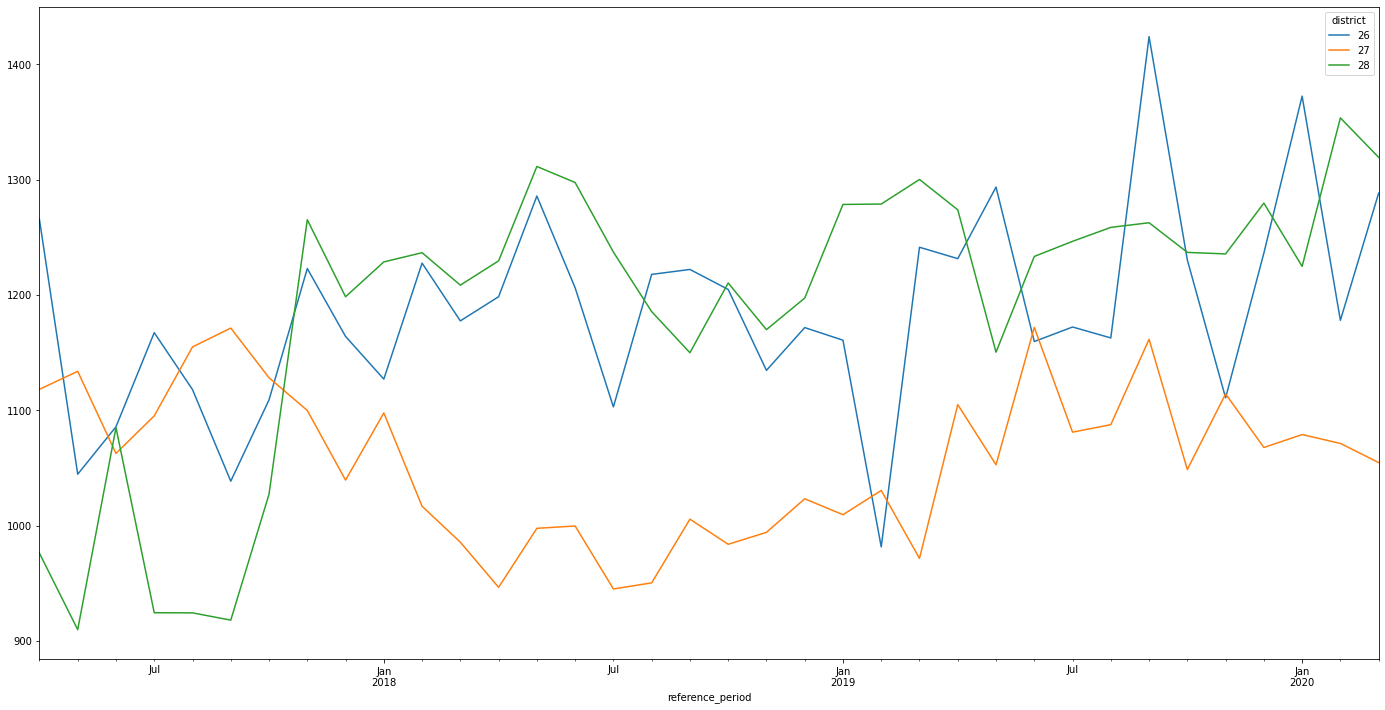

In [66]:
mean_df.plot(figsize=(24,12), y=[26,27,28])

In [18]:
combined_df[(combined_df['project_name'].str.contains('WOODLEIGH')) & (combined_df['type_of_sale'] == 'New Sale')].sort_values('unit_price_psf')

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
22934,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,988000,-,570,Strata,01 to 05,1732,2019-05-31
22839,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,988000,-,570,Strata,01 to 05,1732,2019-06-30
22816,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1156000,-,667,Strata,01 to 05,1732,2019-06-30
24540,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1026000,-,592,Strata,01 to 05,1733,2020-03-31
22676,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1026000,-,592,Strata,01 to 05,1733,2019-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1414000,-,646,Strata,06 to 10,2189,2018-11-30
23418,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,1497000,-,646,Strata,06 to 10,2318,2018-11-30
22840,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,2500000,-,1076,Strata,11 to 15,2323,2019-06-30
22958,THE WOODLEIGH RESIDENCES,BIDADARI PARK DRIVE,Apartment,13,RCR,2017,New Sale,1,3428100,-,1475,Strata,11 to 15,2325,2019-05-31


In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
combined_df[combined_df['postal_district'] == 26].sort_values(['project_name', 'unit_price_psf'])

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
53864,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1107000,-,1259,Strata,01 to 05,879,2017-03-31
53842,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1100000,-,1238,Strata,06 to 10,889,2017-05-31
53795,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1700000,-,1873,Strata,11 to 15,908,2017-09-30
53790,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1160000,-,1238,Strata,01 to 05,937,2017-10-31
53781,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1168888,-,1238,Strata,01 to 05,944,2017-10-31
53862,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1190000,-,1259,Strata,06 to 10,945,2017-03-31
53824,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1175000,-,1238,Strata,06 to 10,949,2017-07-31
53857,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1600000,-,1658,Strata,11 to 15,965,2017-04-30
53814,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,800000,-,807,Strata,01 to 05,991,2017-07-31
53832,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,805000,-,807,Strata,06 to 10,997,2017-06-30


In [24]:
df1 = pd.read_csv('data/private_prop_transactions/total_transactions.csv')
sorted(df1['reference_period'].unique())

['2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31']

In [27]:
df1.sort_values(['reference_period', 'project'])
df1.drop_duplicates().sort_values(['reference_period', 'project'])

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure
25444,34643.794200,31880.644800,WOODSVILLE CLOSE,18 WOODSVILLE,RCR,117.0,1259.377519,1500000.0,NaN,12820.512821,1191.064615,11-15,1.0,2017-04-30,3,Apartment,13,Strata,Freehold
48762,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
76327,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
14846,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1266878.0,NaN,28792.681818,2674.927670,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
14860,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1221713.0,NaN,27766.204545,2579.564811,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49216,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
76477,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
129179,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
59592,35393.769191,12263.162700,YUNNAN CRESCENT,YUNNAN GARDENS,OCR,236.9,2549.970378,2420000.0,NaN,10215.280709,949.030632,-,1.0,2020-03-31,3,Terrace,22,Land,Freehold
